Running SPYDERMESH as the main code:
stretching
List of indices for polygon vertices
[0, 2]
[0, 1, 2]
[0, 1, 2]
[0, 1, 2]
[0, 2, 4]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]
[[2, 1, 0, 41, 2]]
stretching
List of indices for polygon vertices
[0, 2]
[0, 1, 2]
[0, 1, 2]
[0, 1, 2]
[0, 2, 4]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]
[[2, 1, 0, 41, 2]]
stretching
List of indices for polygon vertices
[0, 2]
[0, 1, 2]
[0, 1, 2]
[0, 1, 2]
[0, 2, 4]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]
[[2, 1, 0, 41, 2]]
stretching
List of indices for polygon vertic

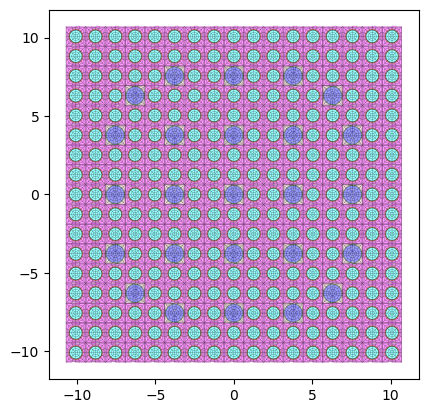

Asum error= 1.4779288903810084e-11


In [3]:
# -*- coding: utf-8 -*-
"""
Created on Tue Jul 18 17:01:06 2023

@author: jean.ragusa
"""

import time as time
import copy
import numpy as np
from spydermesh import spydermesh
import matplotlib.pyplot as plt

plt.close("all")
# import matplotlib
# from matplotlib.patches import Polygon
# from matplotlib.collections import PatchCollection


print("Running SPYDERMESH as the main code:")

plot_pins = False
color_list = [
    "red",
    "yellow",
    "green",
    "blue",
    "pink",
    "cyan",
    "magenta",
    "blue",
    "white",
    "orange",
    "purple",
]

# %% global var
pitch = 0.63  # used to create that are alter deployed by x&y symetries
full_pitch = pitch * 2

# %%
def create_fuel_pin(
    pin_name,
    radii,
    nsub,
    half_list,
    mat_list,
    rad_mod,
    nsub_mod,
    mod_name,
    sectors,
    plot_pins,
):

    pin = spydermesh(pitch, pin_name)

    # polygonalize circles
    for R, n, hs, mat in zip(radii, nsub, half_list, mat_list):
        pin.polygonalize_circle(R, n, mat, half_shift=hs, preserve_vol=True)
    # add an extra circle in moderator
    pin.polygonalize_circle(
        rad_mod, nsub_mod, mod_name, half_shift=False, preserve_vol=False, stretch=0.35
    )

    # add a thin rectangular outer skin in moderator
    almost_pitch = np.max(pin.vert[-1][0])
    dp = pin.pitch - almost_pitch
    pin.add_corner_verts(mod_name, p=almost_pitch + dp / 2)
    # finish off moderator to fill the quarter pin pitch area
    pin.add_corner_verts(mod_name)

    # sectorization
    for iring, sector in enumerate(sectors):
        pin.add_sector_intersection(sector, iring)
    pin.collect_all_vertices()
    pin.make_polygons()

    pin.deploy_qpc()

    if plot_pins:
        uniq_mat, mat_id, mat_count = np.unique(
            pin.mat_poly, return_index=False, return_inverse=True, return_counts=True
        )
        colors = []
        for id_ in mat_id:
            colors.append(color_list[id_])
        pin.plot_polygons(colors=colors)
    return pin


# %%
def create_gt_pin(
    pin_name,
    radii,
    nsub,
    half_list,
    mat_list,
    rad_mod,
    nsub_mod,
    mod_name,
    sectors,
    plot_pins,
):

    pin = spydermesh(pitch, pin_name)

    # polygonalize circles
    for R, n, hs, mat in zip(radii, nsub, half_list, mat_list):
        pin.polygonalize_circle(R, n, mat, half_shift=hs, preserve_vol=True)
    # add an extra circle in moderator
    pin.polygonalize_circle(
        rad_mod, nsub_mod, mod_name, half_shift=True, preserve_vol=False, stretch=0.5
    )

    # add a thin rectangular outer skin in moderator
    almost_pitch = np.max(pin.vert[-1][0])
    dp = pin.pitch - almost_pitch
    pin.add_corner_verts(mod_name, p=almost_pitch + dp / 2)
    # finish off moderator to fill the quarter pin pitch area
    pin.add_corner_verts(mod_name)

    # sectorization
    for iring, sector in enumerate(sectors):
        if iring == len(sectors) - 1:
            pin.add_sector_intersection(sector, iring, half_shift=False)
        else:
            pin.add_sector_intersection(sector, iring, half_shift=True)
    pin.collect_all_vertices()
    pin.make_polygons()

    pin.deploy_qpc()

    if plot_pins:
        uniq_mat, mat_id, mat_count = np.unique(
            pin.mat_poly, return_index=False, return_inverse=True, return_counts=True
        )
        colors = []
        for id_ in mat_id:
            colors.append(color_list[id_])
        pin.plot_polygons(colors=colors)
    return pin


# %%---- fuel pins

# radii: 4 in fuel, one in gap, one in clad
radii = [0.13, 0.26, 0.39, 0.4096, 0.418, 0.475]
# angular subdivisions
nsub = [1, 1, 3, 3, 3, 3]
# whether polygons are rotated by half the angle spread
half_list = [False] * 6
# moderator zone
rad_mod = 0.5
nsub_mod = 3
mod_name = "water"
# sectorization
sectors = [0, 1, 1, 3, 3, 3, 3, 3, 3]

pin_name = "U"
# material names
mat_list = ["uox", "uox", "uox", "uox", "gap", "clad"]
uox = create_fuel_pin(
    pin_name,
    radii,
    nsub,
    half_list,
    mat_list,
    rad_mod,
    nsub_mod,
    mod_name,
    sectors,
    plot_pins,
)

pin_name = "1"
# material names
mat_list = ["mox1", "mox1", "mox1", "mox1", "gap", "clad"]
mox1 = create_fuel_pin(
    pin_name,
    radii,
    nsub,
    half_list,
    mat_list,
    rad_mod,
    nsub_mod,
    mod_name,
    sectors,
    plot_pins,
)

pin_name = "2"
# material names
mat_list = ["mox2", "mox2", "mox2", "mox2", "gap", "clad"]
mox2 = create_fuel_pin(
    pin_name,
    radii,
    nsub,
    half_list,
    mat_list,
    rad_mod,
    nsub_mod,
    mod_name,
    sectors,
    plot_pins,
)

pin_name = "3"
# material names
mat_list = ["mox3", "mox3", "mox3", "mox3", "gap", "clad"]
mox3 = create_fuel_pin(
    pin_name,
    radii,
    nsub,
    half_list,
    mat_list,
    rad_mod,
    nsub_mod,
    mod_name,
    sectors,
    plot_pins,
)

# %% inspect
# import inspect


# def inspect_object(my_object):
#     print("\nInspecting object {}".format(my_object.name))
#     # Get all attributes of the object
#     attributes = dir(my_object)

#     # Separate methods and variables
#     methods = []
#     variables = []

#     for attr in attributes:
#         # Skip default attributes
#         if attr.startswith("__"):
#             continue
#         # Check if the attribute is a method
#         if inspect.ismethod(getattr(my_object, attr)) or inspect.isfunction(
#             getattr(my_object, attr)
#         ):
#             methods.append(attr)
#         else:
#             variables.append(attr)
#     # Print methods
#     print("Methods:")
#     for method in methods:
#         print(method)
#     # Print variables with their values
#     print("\nVariables:")
#     for variable in variables:
#         # value = getattr(my_object, variable)
#         # print(f"{variable} = {value}")
#         print(f"{variable}")


# %%---- guide tube
pin_name = "G"

# radii = [0.13, 0.25, 0.41, 0.55, 0.59]
radii = [0.13, 0.25, 0.41, 0.5625, 0.6025]
nsub = [1, 1, 2, 2, 2]
half_list = [True] * 5
mat_list = ["iwgt", "iwgt", "iwgt", "iwgt", "gt"]
rad_mod_gt = 0.610
nsub_mod_gt = 2
mod_name_gt = "owgt"
sectors = [0, 1, 1, 2, 2, 2, 2, 3]

gtube = create_gt_pin(
    pin_name,
    radii,
    nsub,
    half_list,
    mat_list,
    rad_mod_gt,
    nsub_mod_gt,
    mod_name_gt,
    sectors,
    plot_pins,
)

# %%
# select a spyderweb pin using their name
def pick_pin(list_pins, name):
    for pin in list_pins:
        if pin.name == name:
            return copy.deepcopy(pin)
    raise ValueError("name {} not found in list of pins".format(name))


# %% lattice: empty spyderweb structure with the **full** pin pitch
lattice = spydermesh(full_pitch, "lat")

# list all of the possible pin types that were created
list_pins = [uox, mox1, mox2, mox3, gtube]

# %% select a specific lattice
casename = "17x17"
# casename = "2x2"
print("mycasename =", casename)

if casename == "2x2":
    lat = np.empty((2, 2), dtype="<U1")
    lat[:, :] = "U"
    lat[1, 1] = "G"
    print(lat)
elif casename == "3x3":
    lat = np.empty((3, 3), dtype="<U1")
    lat[:, :] = "U"
    lat[1, 1] = "G"
    print(lat)
elif casename == "4x4":
    lat = np.empty((4, 4), dtype="<U1")
    lat[:, :] = "U"
    lat[1, 1] = "G"
    print(lat)
elif casename == "17x17":
    lat = np.empty((17, 17), dtype="<U1")
    lat[:, :] = "U"
    gt = []
    gt.append([2, 5])
    gt.append([2, 8])
    gt.append([2, 11])
    gt.append([3, 3])
    gt.append([3, 13])
    gt.append([5, 2])
    gt.append([5, 5])
    gt.append([5, 8])
    gt.append([5, 11])
    gt.append([5, 14])
    gt.append([8, 2])
    gt.append([8, 5])
    gt.append([8, 8])
    gt.append([8, 11])
    gt.append([8, 14])
    gt.append([11, 2])
    gt.append([11, 5])
    gt.append([11, 8])
    gt.append([11, 11])
    gt.append([11, 14])
    gt.append([13, 3])
    gt.append([13, 13])
    gt.append([14, 5])
    gt.append([14, 8])
    gt.append([14, 11])
    for ij in gt:
        i, j = ij[0], ij[1]
        lat[i, j] = "G"
    print(lat)
elif casename == "17x17M":
    lat = np.empty((17, 17), dtype="<U1")
    lat[:, :] = "1"
    lat[0, :] = "3"
    lat[-1, :] = "3"
    lat[:, 0] = "3"
    lat[:, -1] = "3"
    lat[1:3, 1:-1] = "2"
    lat[-3:-1, 1:-1] = "2"
    lat[1:-1, 1:3] = "2"
    lat[1:-1, -3:-1] = "2"
    lat[3, 4] = "2"
    lat[-4, 4] = "2"
    lat[4, 3] = "2"
    lat[-5, 3] = "2"
    lat[3, -5] = "2"
    lat[-4, -5] = "2"
    lat[4, -4] = "2"
    lat[-5, -4] = "2"
    gt = []
    gt.append([2, 5])
    gt.append([2, 8])
    gt.append([2, 11])
    gt.append([3, 3])
    gt.append([3, 13])
    gt.append([5, 2])
    gt.append([5, 5])
    gt.append([5, 8])
    gt.append([5, 11])
    gt.append([5, 14])
    gt.append([8, 2])
    gt.append([8, 5])
    gt.append([8, 8])
    gt.append([8, 11])
    gt.append([8, 14])
    gt.append([11, 2])
    gt.append([11, 5])
    gt.append([11, 8])
    gt.append([11, 11])
    gt.append([11, 14])
    gt.append([13, 3])
    gt.append([13, 13])
    gt.append([14, 5])
    gt.append([14, 8])
    gt.append([14, 11])
    for ij in gt:
        i, j = ij[0], ij[1]
        lat[i, j] = "G"
    print(lat)
elif casename == "C5G7_2x2":
    latU = np.empty((17, 17), dtype="<U1")
    latU[:, :] = "U"
    gt = []
    gt.append([2, 5])
    gt.append([2, 8])
    gt.append([2, 11])
    gt.append([3, 3])
    gt.append([3, 13])
    gt.append([5, 2])
    gt.append([5, 5])
    gt.append([5, 8])
    gt.append([5, 11])
    gt.append([5, 14])
    gt.append([8, 2])
    gt.append([8, 5])
    gt.append([8, 8])
    gt.append([8, 11])
    gt.append([8, 14])
    gt.append([11, 2])
    gt.append([11, 5])
    gt.append([11, 8])
    gt.append([11, 11])
    gt.append([11, 14])
    gt.append([13, 3])
    gt.append([13, 13])
    gt.append([14, 5])
    gt.append([14, 8])
    gt.append([14, 11])
    for ij in gt:
        i, j = ij[0], ij[1]
        latU[i, j] = "G"
    print(latU)

    latM = np.empty((17, 17), dtype="<U1")
    latM[:, :] = "1"
    latM[0, :] = "3"
    latM[-1, :] = "3"
    latM[:, 0] = "3"
    latM[:, -1] = "3"
    latM[1:3, 1:-1] = "2"
    latM[-3:-1, 1:-1] = "2"
    latM[1:-1, 1:3] = "2"
    latM[1:-1, -3:-1] = "2"
    latM[3, 4] = "2"
    latM[-4, 4] = "2"
    latM[4, 3] = "2"
    latM[-5, 3] = "2"
    latM[3, -5] = "2"
    latM[-4, -5] = "2"
    latM[4, -4] = "2"
    latM[-5, -4] = "2"
    gt = []
    gt.append([2, 5])
    gt.append([2, 8])
    gt.append([2, 11])
    gt.append([3, 3])
    gt.append([3, 13])
    gt.append([5, 2])
    gt.append([5, 5])
    gt.append([5, 8])
    gt.append([5, 11])
    gt.append([5, 14])
    gt.append([8, 2])
    gt.append([8, 5])
    gt.append([8, 8])
    gt.append([8, 11])
    gt.append([8, 14])
    gt.append([11, 2])
    gt.append([11, 5])
    gt.append([11, 8])
    gt.append([11, 11])
    gt.append([11, 14])
    gt.append([13, 3])
    gt.append([13, 13])
    gt.append([14, 5])
    gt.append([14, 8])
    gt.append([14, 11])
    for ij in gt:
        i, j = ij[0], ij[1]
        latM[i, j] = "G"
    print(latM)

    lat = np.vstack( ( np.hstack((latU, latM)), np.hstack((latM, latU)) ) )
    # lat = np.vstack( ( np.hstack((latU, latM)), np.hstack((latM, latU)), np.hstack((latU, latM)) ) )
else:
    raise ValueError("casename {} not recognized".format(casename))
# %% put together the lattice

nx, ny = lat.shape

for i in range(nx):
    if i == 0:
        first_row = True
    else:
        first_row = False
    for j in range(ny):
        if j == 0:
            first_col = True
        else:
            first_col = False
        pin = pick_pin(list_pins, lat[i, j])
        # print(fuel.polygons[-1])
        # print(pin.polygons[-1])

        if first_row and first_col:
            lattice.nverts = len(pin.vertices)
            lattice.vertices = np.copy(pin.vertices)
            lattice.polygons = pin.polygons.copy()
            lattice.mat_poly = pin.mat_poly.copy()
            lattice.edge_vert_id = pin.edge_vert_id.copy()
        else:
            # update vertex id's
            poly_pin = pin.polygons.copy()
            for ip, p in enumerate(poly_pin):
                for iv, vid in enumerate(p):
                    pin.polygons[ip][iv] += lattice.nverts
            # update list of polygons
            lattice.polygons += pin.polygons
            # shift vertex locations
            new_verts = np.copy(pin.vertices)
            new_verts[:, 0] += j * full_pitch
            new_verts[:, 1] -= i * full_pitch
            # update vertex coordinate array
            lattice.vertices = np.vstack((lattice.vertices, new_verts))
            # update polygon names
            lattice.mat_poly += pin.mat_poly
            # update indices of vertices that live on the periphery of a pin cell
            edge_vert_id = pin.edge_vert_id[:] + lattice.nverts
            lattice.edge_vert_id = np.hstack((lattice.edge_vert_id, edge_vert_id))
            # update # of vertices so far
            lattice.nverts += len(pin.vertices)


print(lattice.vertices.shape)

# new1_lattice = copy.deepcopy(lattice)
# new1_lattice.make_vertices_unique()
# print(new1_lattice.vertices.shape)

# t0 = time.time()
# new1_lattice = copy.deepcopy(lattice)
# new1_lattice.make_vertices_unique2()
# print('elapsed time =',time.time()-t0)
# print(new1_lattice.vertices.shape)

t0 = time.time()
lattice.make_vertices_unique3()
print('elapsed time =',time.time()-t0)
print(lattice.vertices.shape)


# %%
plot_lattice = True
if plot_lattice:
    uniq_mat, mat_id, mat_count = np.unique(
        lattice.mat_poly, return_index=False, return_inverse=True, return_counts=True
    )
    colors = []
    for id_ in mat_id:
        colors.append(color_list[id_])
    lattice.plot_polygons(colors=colors, size_=.1, lw_=0.2)
    
# %%
lattice.export_to_obj("lattice_{}.obj".format(casename))

# %% verif area
Asum = 0.0
for i, poly in enumerate(lattice.polygons):
    # print(i,poly)
    coord = lattice.vertices[poly]
    A = lattice.PolyArea_noabs(coord[:, 0], coord[:, 1])
    if A < 0:
        print("A<0", poly, coord, A)
    Asum += A
print("Asum error=", Asum - (nx * full_pitch) * (ny * full_pitch))